In [8]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

Text(0.5, 1.0, 'origin')

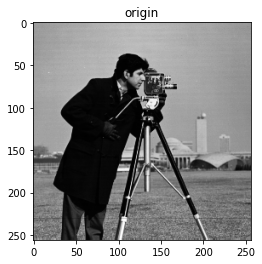

In [9]:
img_path = '/Users/hzh/Library/Mobile Documents/com~apple~CloudDocs/资料/PPT/配图/0304/0303.png'
img = cv2.imread(img_path,0)
plt.imshow(img,cmap='gray')
plt.title('origin')


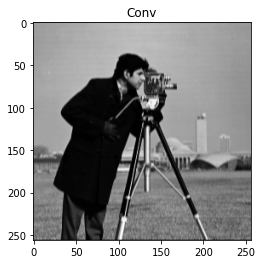

In [10]:
img = torch.tensor(img).float()
kernel_1 = torch.tensor([[0, 1/3,0], [0, 1/3, 0], [0, 1/3, 0]]).clone().detach().float()
output = torch.conv2d(img.unsqueeze(0).unsqueeze(0), kernel_1 .unsqueeze(0).unsqueeze(0),
                          padding=kernel_1 .shape[-1] // 2).squeeze(0).squeeze(0)
plt.imshow(output, cmap='gray')
plt.title('Conv')
plt.show()

In [11]:
def get_sobel_kernel(k=3):
    # get range
    range = np.linspace(-(k // 2), k // 2, k)
    # compute a grid the numerator and the axis-distances
    x, y = np.meshgrid(range, range)
    sobel_2D_numerator = x
    sobel_2D_denominator = (x ** 2 + y ** 2)
    sobel_2D_denominator[:, k // 2] = 1  # avoid division by zero
    sobel_2D = sobel_2D_numerator / sobel_2D_denominator
    return sobel_2D
sobel_2D = torch.tensor(get_sobel_kernel()).float()
print(sobel_2D)



tensor([[-0.5000,  0.0000,  0.5000],
        [-1.0000,  0.0000,  1.0000],
        [-0.5000,  0.0000,  0.5000]])


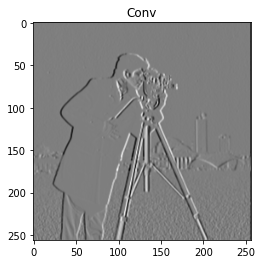

In [12]:
output = torch.conv2d(img.unsqueeze(0).unsqueeze(0), sobel_2D .unsqueeze(0).unsqueeze(0),
                          padding=sobel_2D .shape[-1] // 2).squeeze(0).squeeze(0)
plt.imshow(output, cmap='gray')
plt.title('Conv')
plt.show()

In [13]:

def get_thin_kernels(start=0, end=360, step=45):
        k_thin = 3  # actual size of the directional kernel
        # increase for a while to avoid interpolation when rotating
        k_increased = k_thin + 2

        # get 0° angle directional kernel
        thin_kernel_0 = np.zeros((k_increased, k_increased))
        thin_kernel_0[k_increased // 2, k_increased // 2] = 1
        thin_kernel_0[k_increased // 2, k_increased // 2 + 1:] = -1

        # rotate the 0° angle directional kernel to get the other ones
        thin_kernels = []
        for angle in range(start, end, step):
            (h, w) = thin_kernel_0.shape
            # get the center to not rotate around the (0, 0) coord point
            center = (w // 2, h // 2)
            # apply rotation
            rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
            kernel_angle_increased = cv2.warpAffine(thin_kernel_0, rotation_matrix, (w, h), cv2.INTER_NEAREST)

            # get the k=3 kerne
            kernel_angle = kernel_angle_increased[1:-1, 1:-1]
            is_diag = (abs(kernel_angle) == 1)  # because of the interpolation
            kernel_angle = kernel_angle * is_diag  # because of the interpolation
            thin_kernels.append(kernel_angle)
        return thin_kernels

In [17]:


thin_kernels = torch.tensor(get_thin_kernels()).float()


for i in range(8):
    print(thin_kernels[i])
#     output = torch.conv2d(img.unsqueeze(0).unsqueeze(0), thin_kernels[i].unsqueeze(0).unsqueeze(0),
#                           padding=thin_kernels.shape[-1] // 2).squeeze(0).squeeze(0)
#     plt.imshow(output, cmap='gray')
#     plt.title('Conv')
#     plt.show()

tensor([[ 0.,  0.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  0.]])
tensor([[ 0., -0., -1.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  0.]])
tensor([[ 0., -1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.]])
tensor([[-1., -0.,  0.],
        [-0.,  1.,  0.],
        [ 0.,  0.,  0.]])
tensor([[ 0.,  0.,  0.],
        [-1.,  1.,  0.],
        [ 0.,  0.,  0.]])
tensor([[ 0.,  0.,  0.],
        [-0.,  1.,  0.],
        [-1., -0.,  0.]])
tensor([[ 0.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -1.,  0.]])
tensor([[ 0.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0., -0., -1.]])
